# Projeto Final Big Data Science

- Aluno: Karina Barbosa Maranhão (karina_maranhao@msn.com)

- Turma: Maio/2022

- Projeto: Análise dos dados coletas no ENEM 2021

## Introdução
---

Os dados do Exame Nacional do Ensino Médio (Enem) são divulgados no portal do Governo Federal, sob a responsabilidade do INEP, o ENEM foi criado em 2018 e existem dados divulgados desde do ENEM de 2010.

O Enem é utilizado como critério de seleção para os estudantes que pretendem concorrer a uma bolsa no Programa Universidade para Todos (ProUni). Além disso, cerca de 500 universidades já usam o resultado do exame como critério de seleção para o ingresso no ensino superior, seja complementando ou substituindo o vestibular.

Com a vigência da Lei Geral de Proteção de Dados (LGPD), não consta nos microdados quaisquer variáveis que permita a identificação direta do participante, tais como nome, logradouro do endereço, e-mail, número do CPF, data de nascimento, dentre outras. Inclusive, o próprio número de inscrição real do participante é substituído por uma máscara gerada sequencialmente.

O Exame Nacional do Ensino Médio (Enem) tem como objetivo primordial aferir se aqueles que dele participam demonstram, ao final do ensino médio, individualmente, domínio dos princípios científicos e tecnológicos que presidem a produção moderna e se detêm conhecimento das formas contemporâneas de linguagem.

Entre 1998 e 2008, o Enem era realizado anualmente, com a aplicação de uma única prova composta por 63 questões interdisciplinares, em 2009, ocorreu a reformulação metodológica do Enem e de sua utilização como forma de seleção nos processos seletivos de muitas universidades federais. Reformularam-se as Matrizes de Referência do Exame, que passaram a ser estruturadas por competências em quatro áreas do conhecimento – Linguagens, Códigos e suas tecnologias; Matemática e suas tecnologias; Ciências Humanas e suas tecnologias e Ciências da Natureza e suas tecnologias –, apresentando, ainda, eixos cognitivos comuns a todas as áreas.

O Exame, com 180 (cento e oitenta) questões objetivas de múltipla escolha e uma proposta de redação, passou a ser aplicado em dois dias seguidos (sábado e domingo), sendo que no primeiro dia os participantes recebiam um caderno de questões com as provas de Ciências da Natureza e suas Tecnologias e Ciências Humanas e suas Tecnologias e, no segundo, um caderno com as provas de Redação e Linguagens, Códigos e suas Tecnologias e Matemática e suas Tecnologias. Além das provas objetivas e da redação, os participantes do Enem respondem a um questionário que contempla questões sobre seu nível socioeconômico, família, educação e trabalho. Em 2021 o questionário era composto por 25 questões.

Os arquivos para análise são disponibilizados em um conjuntos de arquivos contendo as provas, os gabaritos, as informações sobre os itens, e as notas e o questionário respondido pelos inscritos no Enem. Conta ainda com um dicionário onde obtem mais informações sobre as variáveis contidas em cada base.

Referências: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados 

Dados: Aquisição dos dados através INSTITUTO NACIONAL DE ESTUDOS E PESQUISAS EDUCACIONAIS ANÍSIO TEIXEIRA. Microdados do Enem 2021. Brasília: Inep, 2022. Disponível em: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem. Acesso em: 15 ago. 2022.

## Objetivo
---
Entender fatores que influenciam o desempenho no ENEM e explorar algumas técnicas de machine learning para predição.

## Desenvolvimento do Projeto
---

1. Entendimento do problema e do contexto do negócio
2. Aquisição dos dados
3. Limpeza dos dados
4. Análise exploratória dos dados
5. Manipulação dos dados: seleção, criação, formatação, agregação
6. Modelagem dos dados
7. Avaliação

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from datetime import datetime

In [2]:
start = datetime.now()
df = pd.read_csv("./microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv", encoding_errors = 'replace', sep = ';')
print(f'Tempo para leitura dos dados: {datetime.now() - start}')

Tempo para leitura dos dados: 0:01:03.855668


In [3]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [4]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())
    
show_info(df)

DATASET SHAPE:  (3389832, 76) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO

### Análise do perfil dos participantes
---

- O ENEM de 2021 teve 3.389.832 de inscritos
- 51% estão na faixa estária entre 17 e 19 anos
- 62% são do sexo feminino
- 88% são solteiros, como esperado devido a faixa etária
- 53% já concluiram o ensino médio e 34% irão concluir no ano de 2021
- 43% são da cor/raça parda

In [5]:
df['NU_INSCRICAO'].count()

3389832

In [6]:
df['TP_FAIXA_ETARIA'].value_counts(normalize=True)

3     0.206313
2     0.183131
4     0.116433
1     0.080924
5     0.073954
11    0.067134
6     0.052240
7     0.038955
12    0.038570
8     0.029671
13    0.027457
9     0.025294
10    0.021004
14    0.017332
15    0.010563
16    0.006066
17    0.003187
18    0.001210
19    0.000396
20    0.000165
Name: TP_FAIXA_ETARIA, dtype: float64

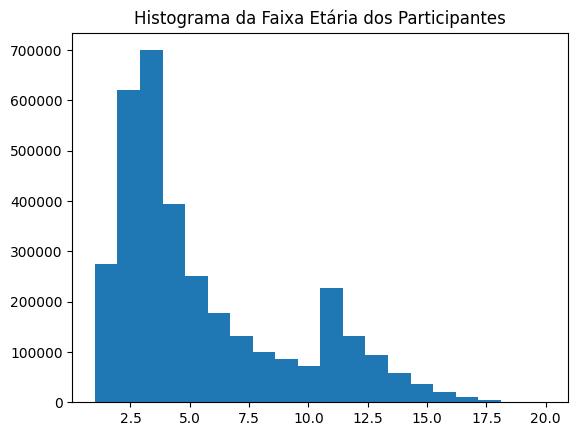

In [7]:
fig, ax = plt.subplots()
df['TP_FAIXA_ETARIA'].hist(ax=ax, bins=20, grid=False)
ax.set_title('Histograma da Faixa Etária dos Participantes')
plt.show()

Reduzir em 3 faixas etárias: Menor que 17 anos, Entre 17 e 19 anos e Maior que 19 anos

In [8]:
def agrupar_faixa_etaria(valor):
    if valor == 1:
        return 'Menor que 17 anos'
    elif valor == 2 or valor == 3 or valor == 4:
        return 'Entre 17 e 19 anos'
    else:
        return 'Maior que 19 anos'

In [9]:
df['TP_FAIXA_ETARIA_REDUZIDA'] = df['TP_FAIXA_ETARIA'].apply(agrupar_faixa_etaria)

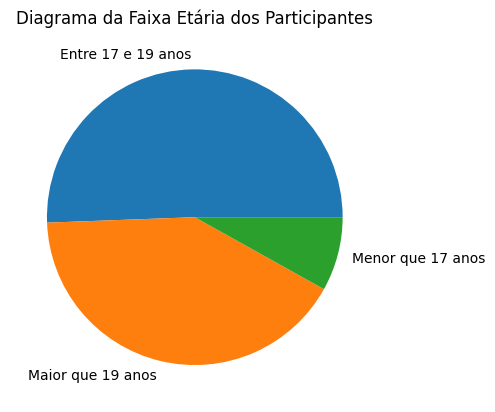

In [10]:
fig, ax = plt.subplots()
df['TP_FAIXA_ETARIA_REDUZIDA'].value_counts(normalize=True).plot(kind = 'pie', ax=ax, ylabel='')
ax.set_title('Diagrama da Faixa Etária dos Participantes')
plt.show()

In [11]:
df['TP_SEXO'].value_counts(normalize=True)

F    0.616705
M    0.383295
Name: TP_SEXO, dtype: float64

In [12]:
es = ['Solteiro(a)', 'Casado(a)/Mora com companheiro(a)', 'Não informado', 'Divorciado(a)/Desquitado(a)/Separado(a)', 'Viúvo(a)']
estado_civil = df['TP_ESTADO_CIVIL'].value_counts(normalize=True)
estado_civil.index = es
estado_civil

Solteiro(a)                                0.883795
Casado(a)/Mora com companheiro(a)          0.057904
Não informado                              0.041191
Divorciado(a)/Desquitado(a)/Separado(a)    0.015972
Viúvo(a)                                   0.001139
Name: TP_ESTADO_CIVIL, dtype: float64

In [13]:
df['TP_ST_CONCLUSAO'].value_counts(normalize=True)

1    0.527865
2    0.339503
3    0.128971
4    0.003662
Name: TP_ST_CONCLUSAO, dtype: float64

In [14]:
df['TP_COR_RACA'].value_counts(normalize=True)

3    0.429949
1    0.401865
2    0.121334
0    0.020989
4    0.020205
5    0.005657
6    0.000001
Name: TP_COR_RACA, dtype: float64

## Análise das escola dos participantes
---

- Os 3 principais estados das escolas dos participantes são São Paulo (SP), Ceará (CE) e Minas Gerais (MG)
- 67% dos participantes são de escola estadual
- 26% de escola privada 
- 96% das escolas estão localizadas em área urbana

In [15]:
df['SG_UF_ESC'].value_counts(normalize=True)

SP    0.171384
CE    0.114473
MG    0.078933
RJ    0.067140
BA    0.059031
GO    0.055250
PR    0.052058
PE    0.049431
RS    0.043995
AM    0.041034
PA    0.033090
SC    0.032433
MA    0.025977
ES    0.021697
PB    0.021685
DF    0.020783
PI    0.016627
RN    0.015899
MT    0.015609
AL    0.013131
MS    0.013114
SE    0.010420
RO    0.009460
TO    0.007938
AC    0.003696
AP    0.003518
RR    0.002195
Name: SG_UF_ESC, dtype: float64

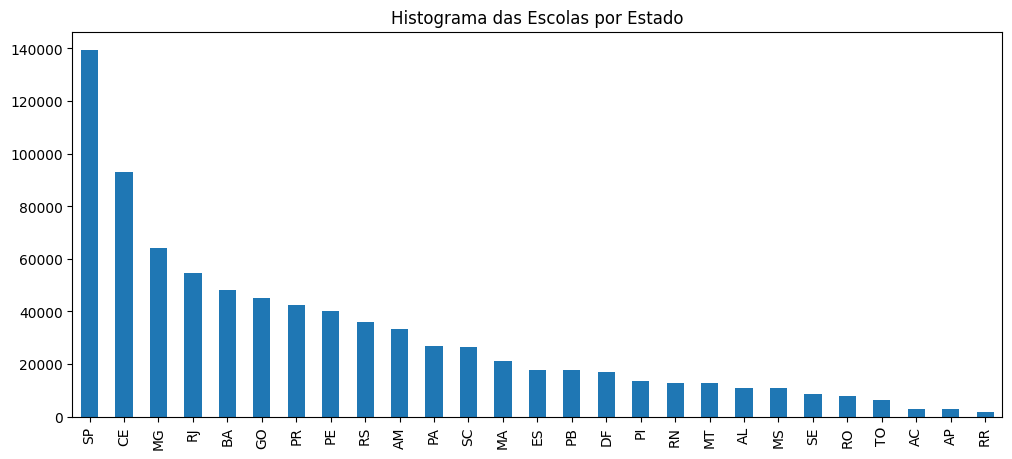

In [16]:
fig,ax = plt.subplots(figsize=(12,5))

df['SG_UF_ESC'].value_counts().plot(kind='bar', ax=ax, grid=False)

ax.set_title('Histograma das Escolas por Estado')
plt.show()

In [17]:
df['TP_DEPENDENCIA_ADM_ESC'].value_counts(normalize=True)

2.0    0.674605
4.0    0.258987
1.0    0.057494
3.0    0.008914
Name: TP_DEPENDENCIA_ADM_ESC, dtype: float64

In [18]:
df['TP_LOCALIZACAO_ESC'].value_counts(normalize=True)

1.0    0.965133
2.0    0.034867
Name: TP_LOCALIZACAO_ESC, dtype: float64

In [19]:
df['TP_SIT_FUNC_ESC'].value_counts(normalize=True)

1.0    0.992637
4.0    0.003652
2.0    0.002845
3.0    0.000866
Name: TP_SIT_FUNC_ESC, dtype: float64

In [20]:
df['SG_UF_PROVA'].value_counts(normalize=True)

SP    0.150436
MG    0.096710
BA    0.078527
RJ    0.070312
CE    0.065052
PE    0.057117
PA    0.054863
RS    0.044393
PR    0.042563
GO    0.040390
MA    0.037732
PB    0.030091
AM    0.026484
RN    0.023842
SC    0.023826
PI    0.023591
DF    0.019913
ES    0.018933
AL    0.016692
MT    0.016545
SE    0.015870
MS    0.012535
RO    0.009676
TO    0.009108
AP    0.006423
AC    0.005999
RR    0.002377
Name: SG_UF_PROVA, dtype: float64

## Análise dos dados da prova objetiva
---

Os procedimentos de cálculo das notas dos participantes e de análise dos itens no Enem têm como base a Teoria de Resposta ao Item (TRI). A TRI é um conjunto de modelos matemáticos que busca representar a relação entre a probabilidade de o participante responder corretamente a uma questão, seu conhecimento na área em que está sendo avaliado e as características (parâmetros) dos itens.

Um aspecto importante da TRI é que ela considera a particularidade de cada item. Assim, as notas não dependem do total de itens da prova, mas de cada item que a compõe. Dessa forma, duas pessoas com a mesma quantidade de acertos na prova são avaliadas de forma distintas a depender de quais itens estão certos e errados e podem, assim, ter notas diferentes.

- A taxa de presença dos participantes nos dois dias de prova é de 66%
- O dia com maior ausência foi o das provas de Ciências da Natureza e Matemática (33%)
- Ciências da Natureza: média de 491.79 e máximo de 867.1
- Ciências Humanas: média de 519.94 e máximo de 846.9
- Linguagens e Códigos: média de 502.56 e máximo de 826.1
- Matemática: média 535.08 e máximo de 953.1
- Na escolha da Língua Estrangeira  53% escolheram Inglês e 47% Espanhol



In [21]:
df[['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']]

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
0,0,1,1,0
1,1,1,1,1
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
3389827,0,0,0,0
3389828,0,0,0,0
3389829,0,0,0,0
3389830,1,1,1,1


In [22]:
1-df[['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']].sum()/df.shape[0]

TP_PRESENCA_CN    0.336621
TP_PRESENCA_CH    0.295985
TP_PRESENCA_LC    0.295985
TP_PRESENCA_MT    0.336621
dtype: float64

In [23]:
(df[['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']].sum(axis=1)==4).sum()/df.shape[0]

0.6612902940322706

In [24]:
nota = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']

In [25]:
df[nota].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
NU_NOTA_CN,2245844.0,491.79,80.57,0.0,431.0,482.0,545.8,867.1
NU_NOTA_CH,2378379.0,519.94,95.79,0.0,445.4,521.9,589.3,846.9
NU_NOTA_LC,2378379.0,502.56,79.16,0.0,447.6,505.9,558.8,826.1
NU_NOTA_MT,2245844.0,535.08,110.63,0.0,444.7,515.4,613.9,953.1


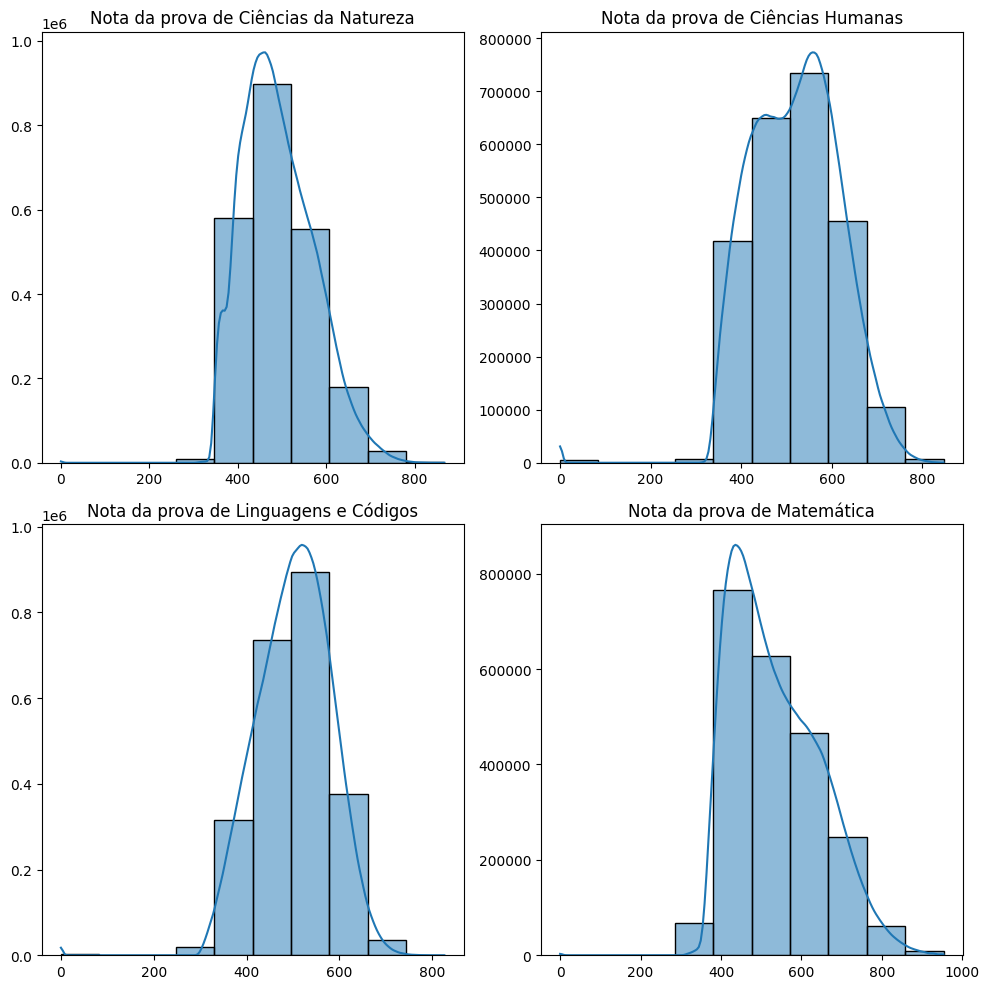

In [26]:
fig, axs = plt.subplots(2,2,figsize=(10,10))

sns.histplot(df['NU_NOTA_CN'],bins=10, ax=axs[0,0], kde=True).set_title('Nota da prova de Ciências da Natureza')
sns.histplot(df['NU_NOTA_CH'],bins=10, ax=axs[0,1], kde=True).set_title('Nota da prova de Ciências Humanas')
sns.histplot(df['NU_NOTA_LC'],bins=10, ax=axs[1,0], kde=True).set_title('Nota da prova de Linguagens e Códigos')
sns.histplot(df['NU_NOTA_MT'],bins=10, ax=axs[1,1], kde=True).set_title('Nota da prova de Matemática')

axs[0,0].set_xlabel('')
axs[0,1].set_xlabel('')
axs[1,0].set_xlabel('')
axs[1,1].set_xlabel('')

axs[0,0].set_ylabel('')
axs[0,1].set_ylabel('')
axs[1,0].set_ylabel('')
axs[1,1].set_ylabel('')

fig.tight_layout()
plt.show()

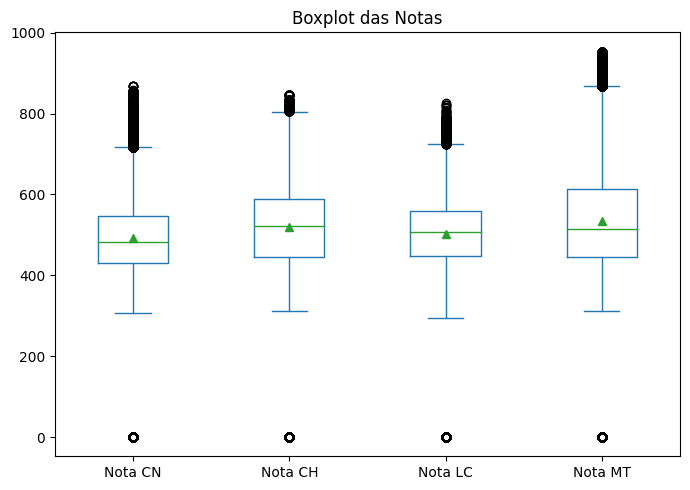

In [27]:
fig, ax =plt.subplots(figsize=(7,5))

df[nota].rename(columns={
    'NU_NOTA_CN': 'Nota CN',
    'NU_NOTA_CH': 'Nota CH', 
    'NU_NOTA_LC': 'Nota LC', 
    'NU_NOTA_MT': 'Nota MT'
}).plot(kind='box', ax=ax, showmeans=True)

ax.set_title('Boxplot das Notas')

fig.tight_layout()
plt.show()

In [28]:
df['TP_LINGUA'].value_counts(normalize=True)

0    0.529536
1    0.470464
Name: TP_LINGUA, dtype: float64

## Análise dos dados da redação
---

- 96% dos participantes não tiveram problemas com a redação como deixar em branco ou fugir do tema.
- A nota média de redação foi de 430.45
- 32% dos participantes tiveram o resultado de 0.0

In [29]:
df['TP_STATUS_REDACAO'].value_counts(normalize=True)

1.0    0.964437
4.0    0.016927
6.0    0.010418
3.0    0.002777
8.0    0.002349
7.0    0.001102
9.0    0.001031
2.0    0.000960
Name: TP_STATUS_REDACAO, dtype: float64

In [30]:
df['NU_NOTA_REDACAO'].describe().round(2)

count    2378379.00
mean         613.50
std          190.71
min            0.00
25%          520.00
50%          600.00
75%          740.00
max         1000.00
Name: NU_NOTA_REDACAO, dtype: float64

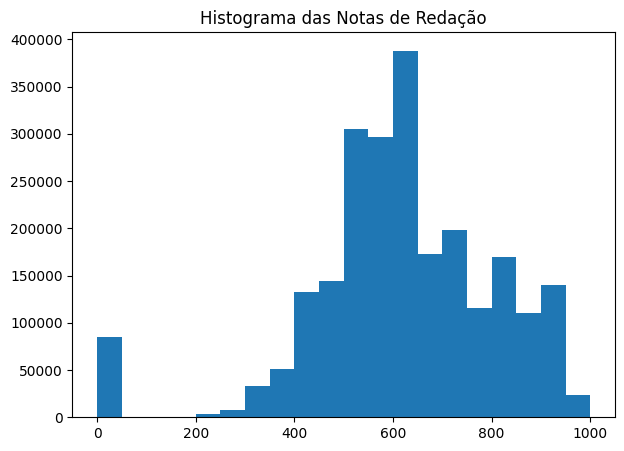

In [31]:
fig,ax = plt.subplots(figsize=(7,5))

df['NU_NOTA_REDACAO'].hist(ax=ax, grid=False, bins=20)

ax.set_title('Histograma das Notas de Redação')
plt.show()

In [32]:
df['NU_NOTA_REDACAO'].value_counts(normalize=True)

560.0     0.064521
600.0     0.064477
580.0     0.060013
620.0     0.049954
540.0     0.049024
640.0     0.048758
520.0     0.046614
680.0     0.037115
0.0       0.035563
660.0     0.035493
480.0     0.034877
500.0     0.032862
720.0     0.030929
700.0     0.028175
760.0     0.027171
460.0     0.025895
800.0     0.025430
880.0     0.025416
840.0     0.025167
440.0     0.024512
740.0     0.024025
900.0     0.022103
920.0     0.022074
780.0     0.021508
860.0     0.021053
820.0     0.020884
400.0     0.015625
420.0     0.015595
940.0     0.014763
360.0     0.011103
380.0     0.010293
960.0     0.007681
340.0     0.006100
320.0     0.005187
300.0     0.002720
280.0     0.002272
980.0     0.002226
260.0     0.001128
240.0     0.000810
220.0     0.000275
200.0     0.000226
180.0     0.000082
160.0     0.000079
80.0      0.000047
40.0      0.000046
120.0     0.000037
140.0     0.000035
60.0      0.000032
100.0     0.000015
1000.0    0.000009
Name: NU_NOTA_REDACAO, dtype: float64

## Análise Exploratória
---

- Analisando o questionamento cultural sobre mulher ser melhor em redação e homem melhor em matemática.

- Quando comparado nota mínima e máxima nos 2 temas (redação e matemática) são iguais, o que também confirma pelo boxplot e histograma que as curvas de notas tanto em redação como matemática são bem parecidas independente do sexo informado na inscrição. Sendo por tanto fazer uma afirmação desse tipo uma questão preconceituosa e sexista.

In [33]:
df[['TP_SEXO', 'NU_NOTA_REDACAO']].head()

,TP_SEXO,NU_NOTA_REDACAO
0,F,760.0
1,M,560.0
2,F,NaN
3,M,780.0
4,F,780.0


In [34]:
df[['TP_SEXO', 'NU_NOTA_REDACAO']].dropna().head()

,TP_SEXO,NU_NOTA_REDACAO
0,F,760.0
1,M,560.0
3,M,780.0
4,F,780.0
6,F,480.0


In [35]:
df[['TP_SEXO', 'NU_NOTA_REDACAO']].groupby('TP_SEXO').describe().round(2)

NU_NOTA_REDACAO                                                  
                  count    mean     std  min    25%    50%    75%     max
TP_SEXO                                                                  
F             1470366.0  624.35  189.05  0.0  520.0  620.0  760.0  1000.0
M              908013.0  595.93  192.08  0.0  520.0  600.0  720.0  1000.0

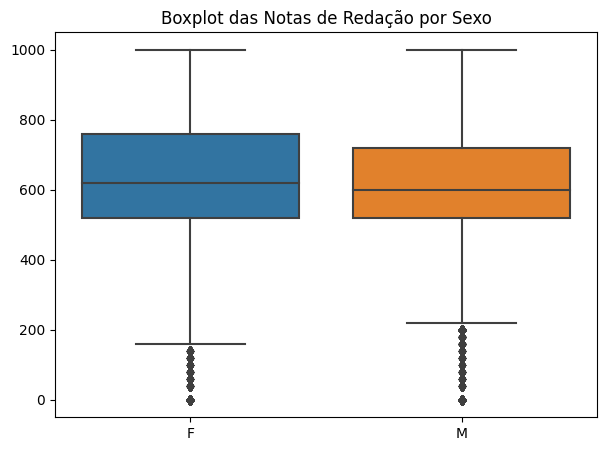

In [36]:
fig,ax = plt.subplots(figsize=(7,5))

sns.boxplot(data=df, x='TP_SEXO', y='NU_NOTA_REDACAO')

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Boxplot das Notas de Redação por Sexo')
plt.show()

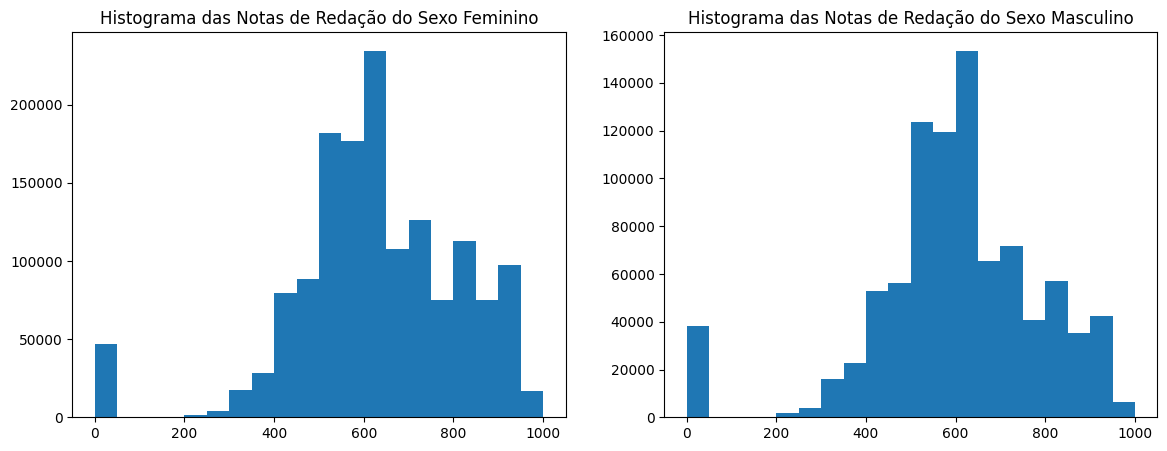

In [37]:
fig,axs = plt.subplots(1,2, figsize=(14,5))

axs[0].hist(df[['TP_SEXO', 'NU_NOTA_REDACAO']][df['TP_SEXO'] == 'F']['NU_NOTA_REDACAO'], bins=20)
axs[1].hist(df[['TP_SEXO', 'NU_NOTA_REDACAO']][df['TP_SEXO'] == 'M']['NU_NOTA_REDACAO'], bins=20)

axs[0].set_title('Histograma das Notas de Redação do Sexo Feminino')
axs[1].set_title('Histograma das Notas de Redação do Sexo Masculino')
plt.show()

In [38]:
df[['TP_SEXO', 'NU_NOTA_MT']].dropna().head()

,TP_SEXO,NU_NOTA_MT
1,M,461.5
3,M,659.5
4,F,582.6
8,F,493.4
9,F,413.3


In [39]:
df[['TP_SEXO', 'NU_NOTA_MT']].groupby('TP_SEXO').describe().round(2)

NU_NOTA_MT                                                 
             count    mean     std  min    25%    50%    75%    max
TP_SEXO                                                            
F        1386041.0  519.81  103.74  0.0  437.1  498.4  589.2  953.1
M         859803.0  559.70  116.77  0.0  461.8  548.9  647.0  953.1

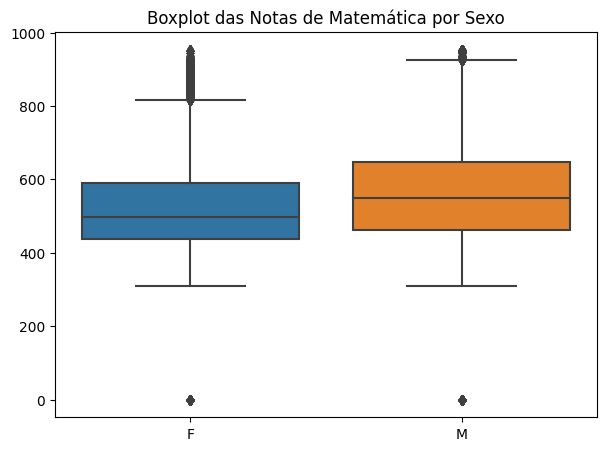

In [40]:
fig,ax = plt.subplots(figsize=(7,5))

sns.boxplot(data=df, x='TP_SEXO', y='NU_NOTA_MT')

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Boxplot das Notas de Matemática por Sexo')

plt.show()

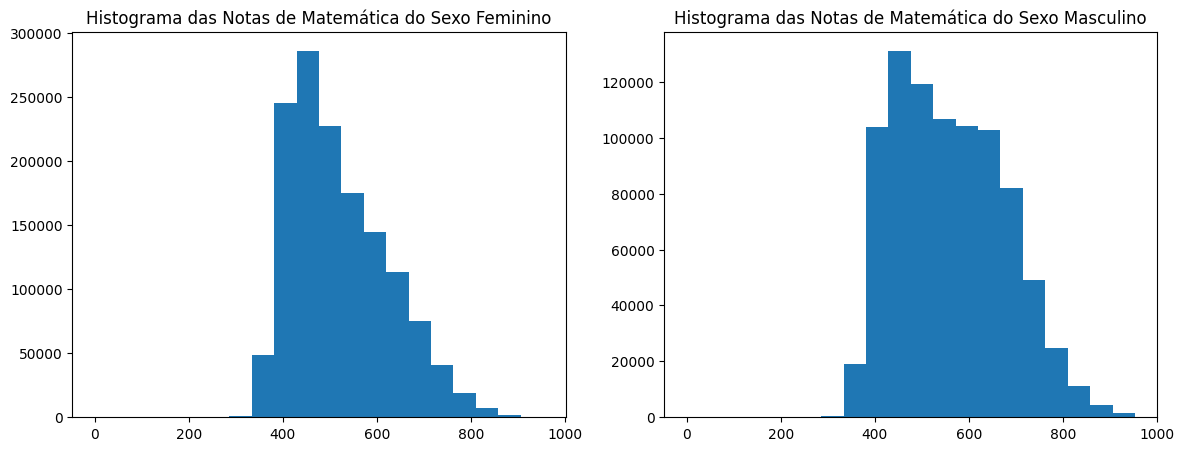

In [41]:
fig,axs = plt.subplots(1,2, figsize=(14,5))

axs[0].hist(df[['TP_SEXO', 'NU_NOTA_MT']][df['TP_SEXO'] == 'F']['NU_NOTA_MT'], bins=20)
axs[1].hist(df[['TP_SEXO', 'NU_NOTA_MT']][df['TP_SEXO'] == 'M']['NU_NOTA_MT'], bins=20)

axs[0].set_title('Histograma das Notas de Matemática do Sexo Feminino')
axs[1].set_title('Histograma das Notas de Matemática do Sexo Masculino')
plt.show()

## Análise Exploratória
---

- Analisando em relação ao tipo de escola (municipal, estadual, federal e privada) observa-se que as escolas federais e privadas possuem valores de notas mais próximos, o que faz sentido, visto que de forma mais comum, o ingresso nas escolas federais ocorre por meio dos exames de seleção (aplicação de prova) ou por meio da análise de históricos escolares dos Ensinos Fundamental.

- Inclusive os institutos federais já estiveram no topo da lista de notas do Enem, porém desde 2017 o Governo Federal parou de divulgar os resultados do Enem por escola. O último ano que se tem é 2016, quando os institutos federais estiveram no topo da lista.

In [42]:
df[nota + ['TP_DEPENDENCIA_ADM_ESC']]
df['TP_DEPENDENCIA_ADM_ESC'] = df['TP_DEPENDENCIA_ADM_ESC'].map({1.: 'Federal', 2.: 'Estadual', 3.: 'Municipal', 4.: 'Privada'})

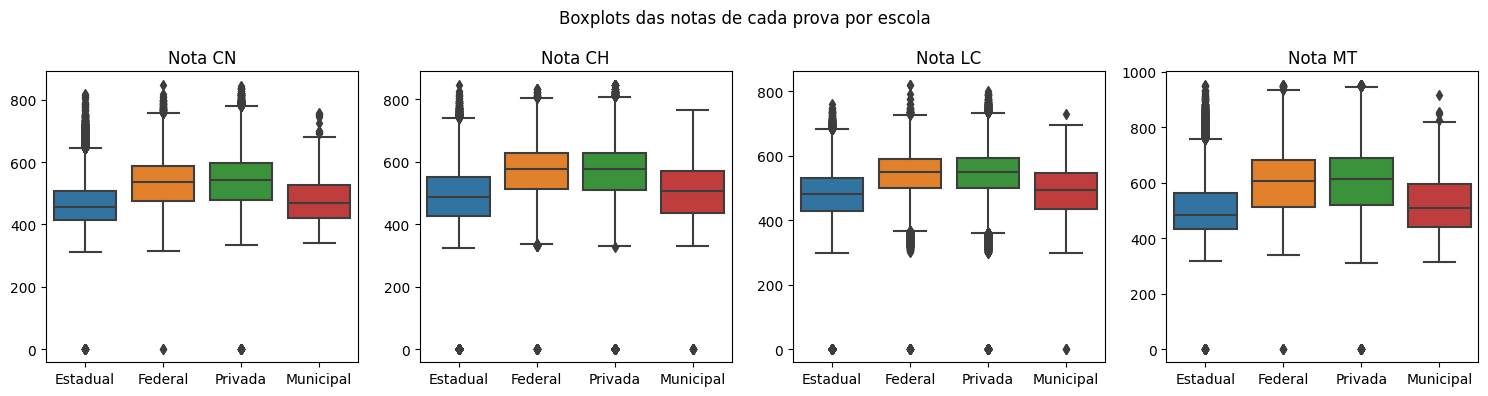

In [43]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))

nome_provas = ['Nota CN', 'Nota CH', 'Nota LC', 'Nota MT']
for i in range(4):
    sns.boxplot(ax=ax[i], data=df, x='TP_DEPENDENCIA_ADM_ESC', y=nota[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')   
    ax[i].set_title(nome_provas[i])
    
fig.suptitle('Boxplots das notas de cada prova por escola')
fig.tight_layout()


## Análise Exploratória
---

- Analisando o investimento em educação por estado e o resultado das notas. 

- Com base nos dados do orçamento do Governo Federal de 2021, os 3 estados com maior investimento em Educação (Despesas pagas) foram: SP, MG e PR.
- E os 3 estados com menor investimento foram: RR, AL e SE.
- Resultado não é conclusivo, visto através do boxplot que a mediana das notas são próximas. Sendo por tanto fazer uma afirmação com base na região uma questão preconceituosa.

In [44]:
df[['SG_UF_ESC', 'NU_NOTA_MT']].groupby('SG_UF_ESC').describe().round(2)

NU_NOTA_MT                                                      
               count    mean     std    min     25%     50%     75%    max
SG_UF_ESC                                                                 
AC            2259.0  504.85   90.85  334.2  432.25  486.20  564.70  831.6
AL            8700.0  526.85  106.62    0.0  439.10  507.55  601.02  948.5
AM           15959.0  480.56   86.98    0.0  417.10  458.50  523.50  953.1
AP            2157.0  494.29   88.72  345.2  425.80  477.30  545.60  861.4
BA           34982.0  524.08  104.66    0.0  439.00  503.10  597.38  953.1
CE           59012.0  501.17  101.68    0.0  423.60  473.70  559.20  953.1
DF           14499.0  552.27  113.43    0.0  459.00  538.40  635.20  953.1
ES           13946.0  553.40  113.01    0.0  459.10  541.80  637.00  953.1
GO           24699.0  528.77  107.88    0.0  440.70  507.90  604.90  953.1
MA           16534.0  501.49   98.01    0.0  425.60  477.40  560.20  920.5
MG           50605.0  576.80  117.58    0.0  478.00  574.00  665.70  953.1
MS            8103.0  536.12  108.19    0.0  447.50  517.70  610.95  948.5
MT            9579.0  530.03  103.72  327.0  445.85  512.70  604.00  944.1
PA           21150.0  504.38   96.80    0.0  428.40  482.50  564.10  913.3
PB           13497.0  529.37  110.01    0.0  440.40  505.60  604.90  944.1
PE           30017.0  533.37  110.20    0.0  443.10  512.30  612.60  953.1
PI           11290.0  527.20  113.92  346.7  435.80  501.00  602.48  953.1
PR           33089.0  554.10  109.96    0.0  463.60  542.30  635.60  953.1
RJ           44407.0  563.57  114.38    0.0  467.50  554.90  649.90  953.1
RN           11037.0  549.09  113.33    0.0  454.80  533.20  633.40  944.1
RO            4965.0  510.79   93.87  322.2  436.50  491.60  571.70  889.8
RR            1237.0  507.70   97.34    0.0  432.20  487.90  570.80  866.3
RS           28116.0  559.24  109.47    0.0  468.30  552.25  641.40  953.1
SC           19906.0  563.75  109.91    0.0  472.70  558.20  646.10  953.1
SE            6772.0  532.78  108.73    0.0  444.10  513.60  610.60  953.1
SP          113247.0  573.70  110.54    0.0  482.90  571.60  655.20  953.1
TO            4507.0  508.78   98.35    0.0  430.85  486.00  574.20  884.1

In [45]:
df[(df['SG_UF_ESC']=='SP') | (df['SG_UF_ESC']=='RR')].head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,TP_FAIXA_ETARIA_REDUZIDA
63,210052097511,2021,3,F,1,1,1,2,0,2,...,A,A,B,B,A,C,B,C,B,Entre 17 e 19 anos
71,210053495342,2021,3,F,1,1,1,2,0,2,...,A,A,B,A,B,E,A,A,B,Entre 17 e 19 anos
75,210053524905,2021,2,F,1,1,1,2,0,2,...,A,B,B,A,B,E,A,C,B,Entre 17 e 19 anos
169,210051235712,2021,2,F,1,1,1,2,0,2,...,A,B,B,A,A,E,A,B,B,Entre 17 e 19 anos
240,210051574300,2021,2,F,1,3,1,2,0,2,...,A,A,B,A,A,B,A,A,B,Entre 17 e 19 anos


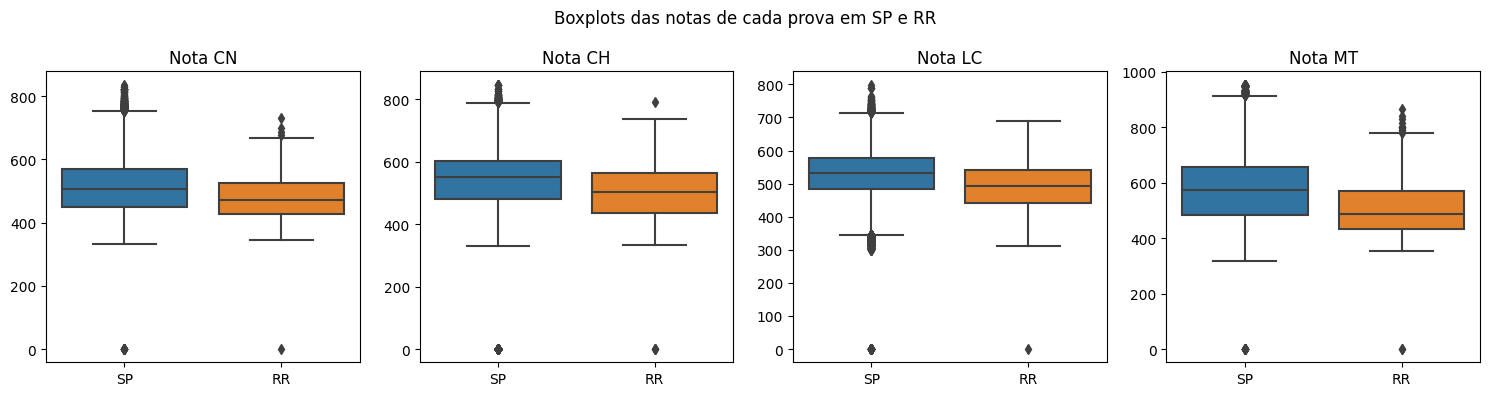

In [46]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))

for i in range(4):
    sns.boxplot(ax=ax[i], data=df[(df['SG_UF_ESC']=='SP') | (df['SG_UF_ESC']=='RR')], x='SG_UF_ESC', y=nota[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')   
    ax[i].set_title(nome_provas[i])
    
fig.suptitle('Boxplots das notas de cada prova em SP e RR')
fig.tight_layout()

## Análise Exploratória
---

- Nesta etapa será considerado que a **nota final do ENEM 2021 é a média entre as 5 notas**: Nota da prova de Ciências da Natureza (NU_NOTA_CN), Nota da prova de Ciências Humanas (NU_NOTA_CH), Nota da prova de Linguagens e Códigos (NU_NOTA_LC), Nota da prova de Matemática (NU_NOTA_MT) e Nota da prova de redação (NU_NOTA_REDACAO), assim criando um nova lista de dados intitulada como **NOTA_FINAL**.

- Analisando a Nota Final por Tipo de Administração da escola, temos o mesmo resultado visto anteriormente para as notas individuais, como as escolas privadas e federais possuem nota mais alta.

In [47]:
df['NOTA_FINAL'] = (df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + df['NU_NOTA_REDACAO'])/5

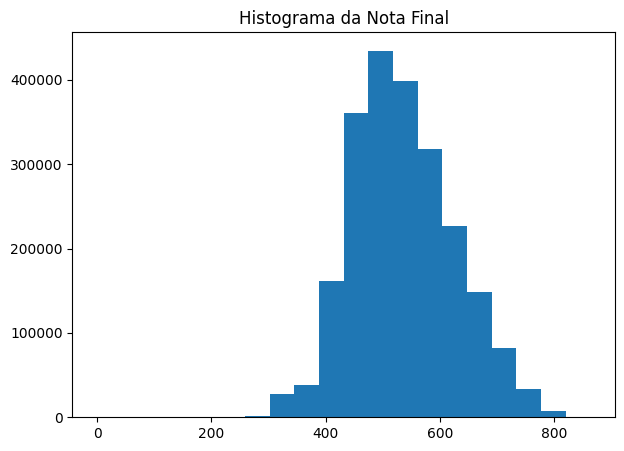

In [48]:
fig,ax = plt.subplots(figsize=(7,5))

df['NOTA_FINAL'].hist(ax=ax, grid=False, bins=20)

ax.set_title('Histograma da Nota Final')
plt.show()

In [49]:
df[['TP_DEPENDENCIA_ADM_ESC', 'NOTA_FINAL']].groupby('TP_DEPENDENCIA_ADM_ESC').describe().round(2)

NOTA_FINAL                                         \
                            count    mean    std     min     25%     50%   
TP_DEPENDENCIA_ADM_ESC                                                     
Estadual                 360253.0  500.66  76.30    0.00  449.72  496.20   
Federal                   41021.0  588.49  80.26  200.98  532.88  591.12   
Municipal                  4887.0  515.05  80.15  278.54  458.18  510.74   
Privada                  196290.0  597.78  82.48    0.00  538.96  599.14   

                                        
                           75%     max  
TP_DEPENDENCIA_ADM_ESC                  
Estadual                549.78  835.66  
Federal                 646.04  832.56  
Municipal               569.97  795.48  
Privada                 658.30  846.10

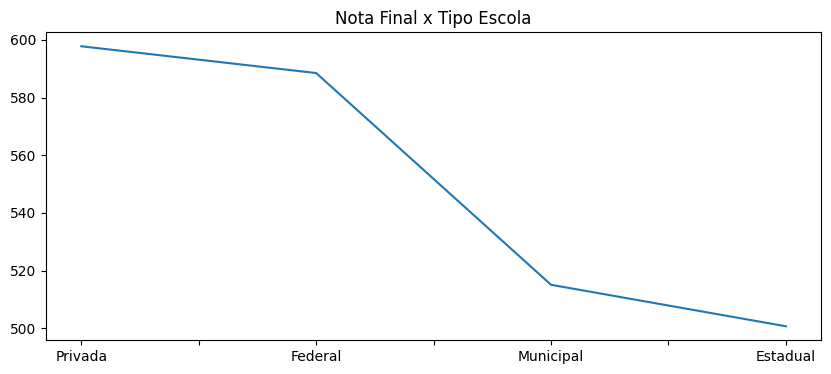

In [50]:
fig, ax = plt.subplots(figsize=(10,4))

df[['TP_DEPENDENCIA_ADM_ESC', 'NOTA_FINAL']].groupby('TP_DEPENDENCIA_ADM_ESC').mean().sort_values(by='NOTA_FINAL', ascending=False).plot(ax=ax, legend=False)

ax.set_xlabel('')
ax.set_title('Nota Final x Tipo Escola')
plt.show()

## Questionário Socioeconômico
---

- O Questionário Socioeconômico do Enem é um conjunto de 25 perguntas sobre a renda mensal da família, quantidade de eletrodomésticos na casa, escolaridade dos responsáveis, ocupação dos responsáveis e número de pessoas que residem na casa.

- Ele surgiu em 2003, na sétima edição do Enem, com objetivo de colher informações importantes que podem servir de base para a formulação de novas políticas públicas na área da educação.

- A classificação econômica é feita com base na posse de bens e não com base na renda familiar. Para cada bem possuído há uma pontuação e cada classe é definida pela soma dessa pontuação. As classes definidas pelo CCEB são A1, A2, B1, B2, C, D e E. Entretanto para fins didáticos irei fazer a classificação apenas baseado na renda familiar.

- Analisando a relação de estudo dos pais com as notas. Os dados indicam que existe uma relação entre o grau de escolaridade e as notas. Para os participantes que tem os pais com maior grau de escolaridade, os resultados são maiores na média.

- Analisando a relação da ocupação dos pais com as notas. Os dados indicam que existe uma relação entre as ocupações dos pais que exigem curso superior e as notas, como é o caso dos pais que são profissionais do Grupo 5 (Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor e outros) onde os respectivos participantes obtiveram as maiores notas e o caso dos pais que são profissionais do Grupo 1 (Lavrador, agricultor sem empregados, bóia fria, criador de animais e outros) onde os respectivos participantes obtiveram as menores notas.

- Analisando a relação da renda familiar com as notas. Os dados indicam que existe uma relação entre a renda familiar e as notas. Famílias com maiores rendas possuem participantes com resultado de valor médio de nota maior.

In [51]:
df['Q001'] = df['Q001'].map({
    'A': 'Nunca estudou', 
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental', 
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade', 
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação', 
    'G': 'Completou a Pós-graduação', 
    'H': 'Não sei'
})

In [52]:
df['Q001'].value_counts(normalize=True)

Completou o Ensino Médio, mas não completou a Faculdade                                   0.281771
Não completou a 4ª série/5º ano do Ensino Fundamental                                     0.188237
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental    0.133647
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio       0.110218
Completou a Faculdade, mas não completou a Pós-graduação                                  0.090905
Não sei                                                                                   0.086557
Completou a Pós-graduação                                                                 0.064891
Nunca estudou                                                                             0.043775
Name: Q001, dtype: float64

In [53]:
df['Q002'] = df['Q002'].map({
    'A': 'Nunca estudou', 
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental', 
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental', 
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade', 
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação', 
    'G': 'Completou a Pós-graduação', 
    'H': 'Não sei'
})

In [54]:
df['Q002'].value_counts(normalize=True)

Completou o Ensino Médio, mas não completou a Faculdade                                   0.338830
Não completou a 4ª série/5º ano do Ensino Fundamental                                     0.139006
Completou a Faculdade, mas não completou a Pós-graduação                                  0.121371
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio       0.117733
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental    0.115187
Completou a Pós-graduação                                                                 0.112137
Nunca estudou                                                                             0.029233
Não sei                                                                                   0.026504
Name: Q002, dtype: float64

In [55]:
df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']] = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].fillna(0)

In [56]:
df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0.0,574.6,472.6,0.0,760.0
1,505.9,551.8,498.3,461.5,560.0
2,0.0,0.0,0.0,0.0,0.0
3,580.7,678.9,638.9,659.5,780.0
4,497.7,532.4,457.6,582.6,780.0


In [57]:
df[['Q001', 'NOTA_FINAL']].groupby('Q001').mean().sort_values(by='NOTA_FINAL', ascending=False)

,NOTA_FINAL
Q001,
Completou a Pós-graduação,599.478713
"Completou a Faculdade, mas não completou a Pós-graduação",587.389404
"Completou o Ensino Médio, mas não completou a Faculdade",543.305069
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",524.579180
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",515.609701
Não sei,508.234104
Não completou a 4ª série/5º ano do Ensino Fundamental,499.822302
Nunca estudou,479.397549


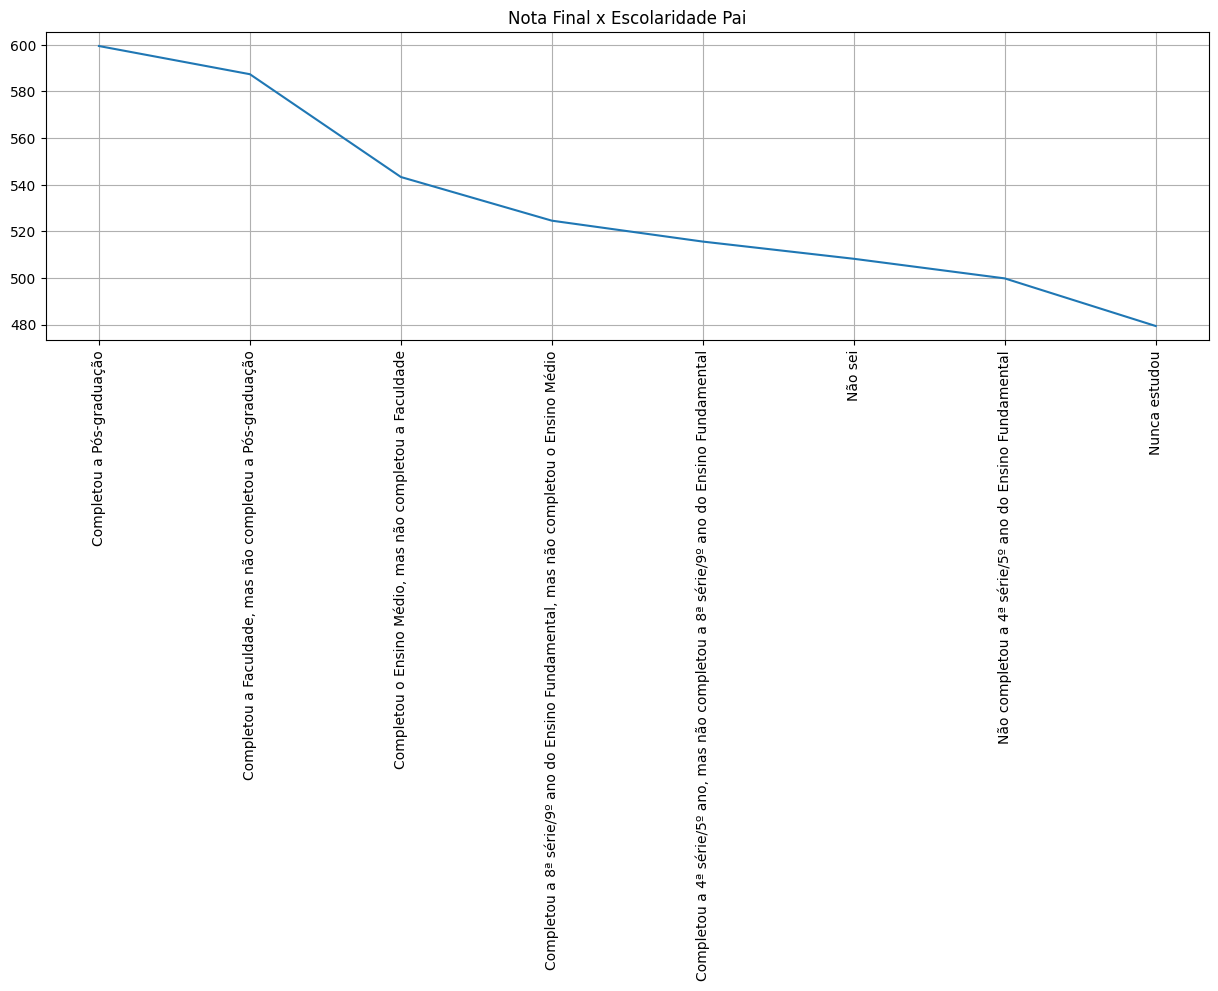

In [58]:
fig, ax = plt.subplots(figsize=(15,4))

df[['Q001', 'NOTA_FINAL']].groupby('Q001').mean().sort_values(by='NOTA_FINAL', ascending=False).plot(ax=ax, rot=90, legend=False)

ax.grid()
ax.set_xlabel('')
ax.set_title('Nota Final x Escolaridade Pai')
plt.show()

In [59]:
df[['Q002', 'NOTA_FINAL']].groupby('Q002').mean().sort_values(by='NOTA_FINAL', ascending=False)

,NOTA_FINAL
Q002,
Completou a Pós-graduação,583.550884
"Completou a Faculdade, mas não completou a Pós-graduação",574.985641
"Completou o Ensino Médio, mas não completou a Faculdade",534.842225
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",514.695512
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",506.964334
Não completou a 4ª série/5º ano do Ensino Fundamental,493.720497
Não sei,490.651805
Nunca estudou,472.645714


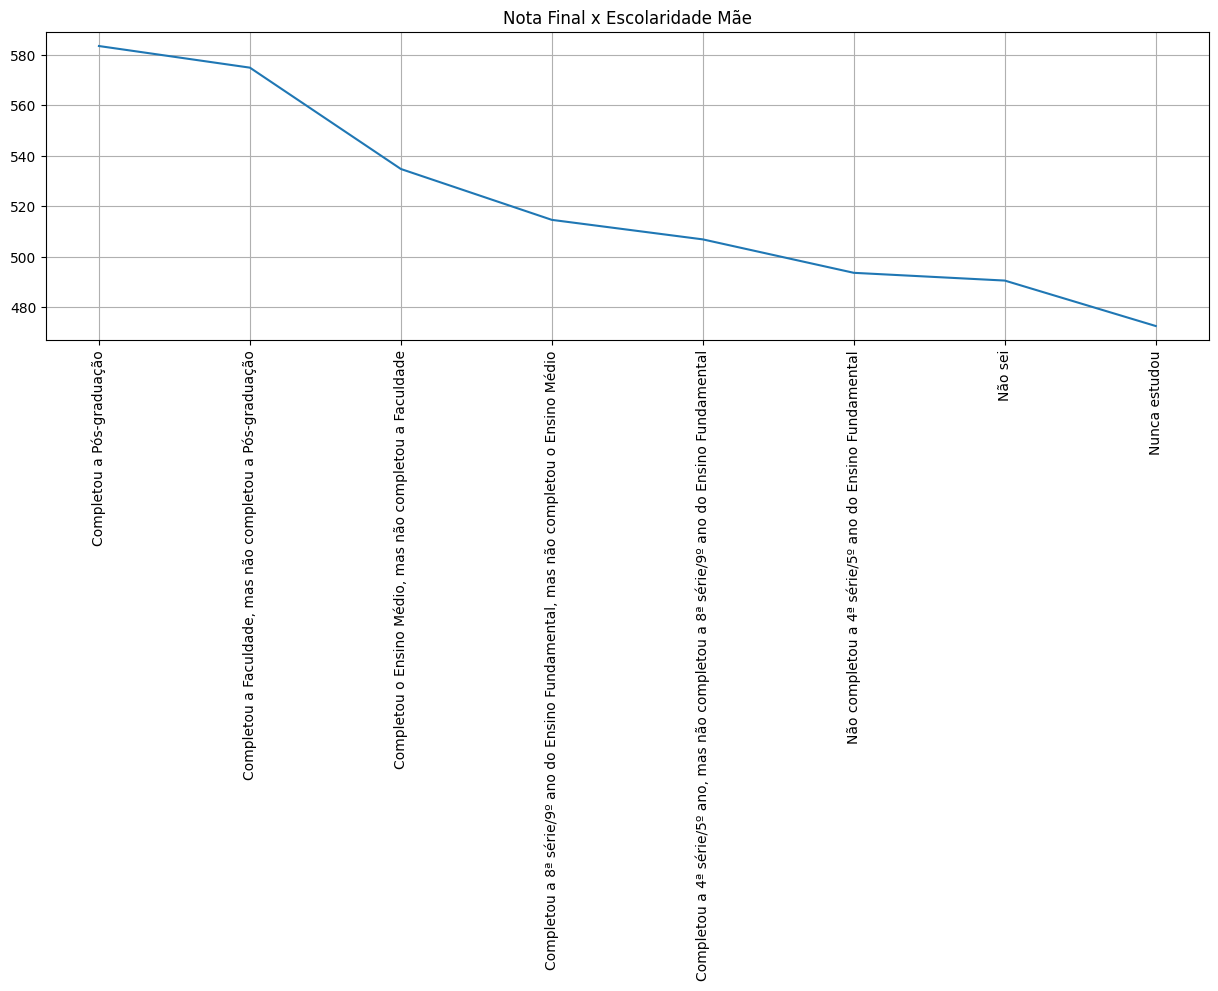

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(15,4))

df[['Q002', 'NOTA_FINAL']].groupby('Q002').mean().sort_values(by='NOTA_FINAL', ascending=False).plot(ax=ax, rot=90, legend=False)

ax.grid()
ax.set_xlabel('')
ax.set_title('Nota Final x Escolaridade Mãe')
plt.show()

In [61]:
df['Q003'] = df['Q003'].map({
    'A': 'Grupo 1', 
    'B': 'Grupo 2', 
    'C': 'Grupo 3', 
    'D': 'Grupo 4',
    'E': 'Grupo 5', 
    'F': 'Não sei'
})

In [62]:
df[['Q003', 'NOTA_FINAL']].groupby('Q003').mean().sort_values(by='NOTA_FINAL', ascending=False)

,NOTA_FINAL
Q003,
Grupo 5,605.034878
Grupo 4,571.905082
Grupo 3,527.010442
Grupo 2,517.564346
Não sei,513.584491
Grupo 1,493.009227


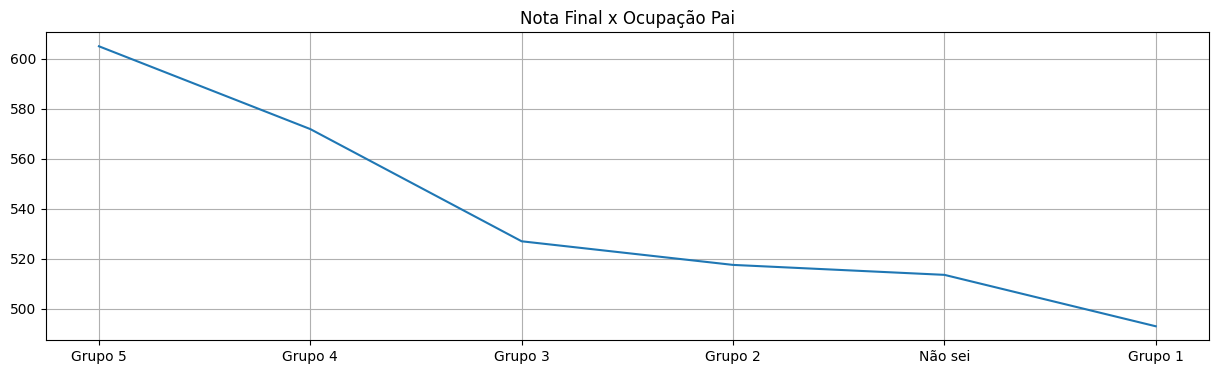

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(15,4))

df[['Q003', 'NOTA_FINAL']].groupby('Q003').mean().sort_values(by='NOTA_FINAL', ascending=False).plot(ax=ax, legend=False)

ax.grid()
ax.set_xlabel('')
ax.set_title('Nota Final x Ocupação Pai')
plt.show()

In [64]:
df['Q004'] = df['Q004'].map({
    'A': 'Grupo 1', 
    'B': 'Grupo 2', 
    'C': 'Grupo 3', 
    'D': 'Grupo 4',
    'E': 'Grupo 5', 
    'F': 'Não sei'
})

In [65]:
df[['Q004', 'NOTA_FINAL']].groupby('Q004').mean().sort_values(by='NOTA_FINAL', ascending=False)

,NOTA_FINAL
Q004,
Grupo 5,605.053091
Grupo 4,567.591756
Grupo 3,528.521172
Não sei,523.433244
Grupo 2,520.208324
Grupo 1,487.721830


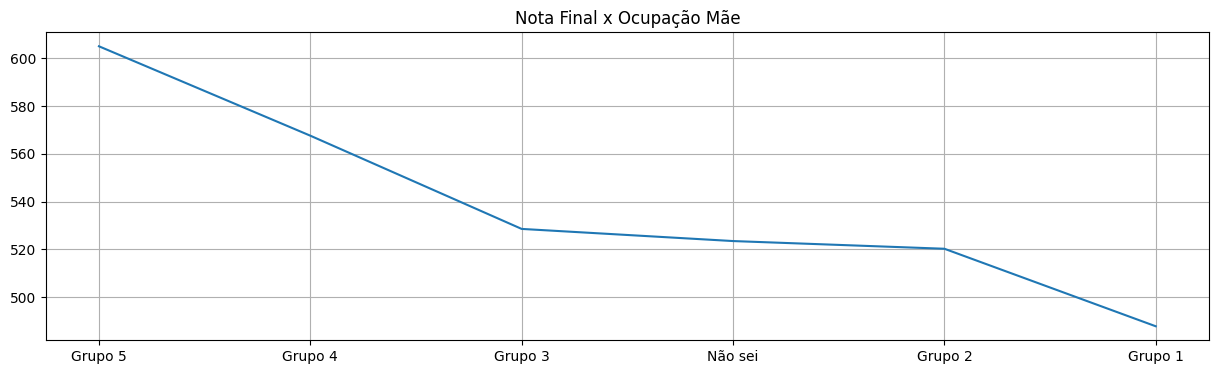

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(15,4))

df[['Q004', 'NOTA_FINAL']].groupby('Q004').mean().sort_values(by='NOTA_FINAL', ascending=False).plot(ax=ax, legend=False)

ax.grid()
ax.set_xlabel('')
ax.set_title('Nota Final x Ocupação Mãe')
plt.show()

In [67]:
def agrupar_renda_familiar(valor):
    if valor == 'A':
        return 'Nenhuma Renda'
    elif valor == 'B' or valor == 'C' or valor == 'D' or valor == 'E' or valor == 'F' :
        return 'Classe DE'
    elif valor == 'G' or valor == 'H' or valor == 'I' or valor == 'J':
         return 'Classe C'
    elif valor == 'K' or valor == 'L' or valor == 'M' or valor == 'N' or valor == 'O':
         return 'Classe B'
    else:
        return 'Classe A'

In [68]:
df['Q006_agrupado'] = df['Q006'].apply(agrupar_renda_familiar)

In [69]:
df['Q006_agrupado'].value_counts(normalize=True)

Classe DE        0.703443
Classe C         0.147052
Classe B         0.063978
Nenhuma Renda    0.059624
Classe A         0.025902
Name: Q006_agrupado, dtype: float64

In [70]:
df[['Q006_agrupado', 'NOTA_FINAL']].groupby('Q006_agrupado').mean().sort_values(by='NOTA_FINAL', ascending=False)

,NOTA_FINAL
Q006_agrupado,
Classe A,629.111885
Classe B,607.056685
Classe C,575.282697
Classe DE,516.365777
Nenhuma Renda,476.032752


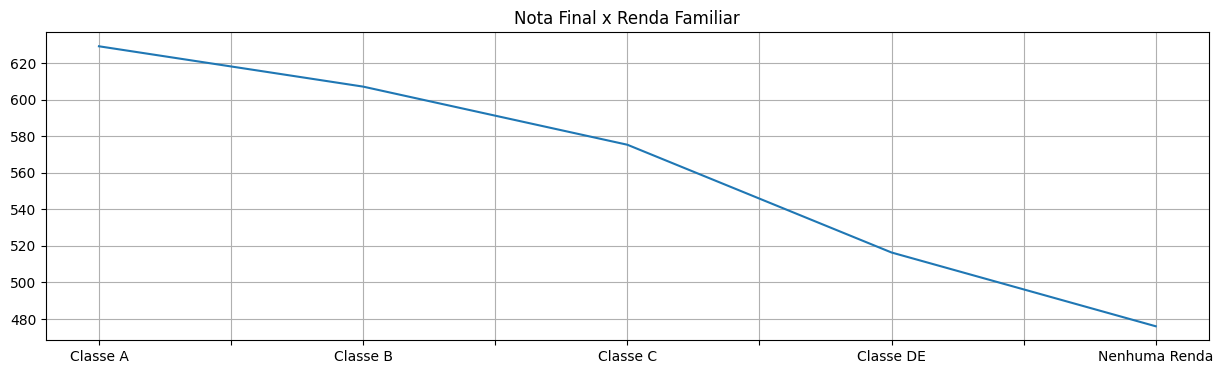

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(15,4))

df[['Q006_agrupado', 'NOTA_FINAL']].groupby('Q006_agrupado').mean().sort_values(by='NOTA_FINAL', ascending=False).plot(ax=ax, legend=False)

ax.grid()
ax.set_xlabel('')
ax.set_title('Nota Final x Renda Familiar')
plt.show()

## Notas de corte nas universidades
---

- Buscado analisar os resultados de nota de corte em algumas universidades, temos as duas notas mais altas: MEDICINA: 771.79 e DIREITO: 685.44. 
- Os dados indicam que as escolas Privadas tiveram mais participantes com notas próximas as notas de corte para os cursos de Medicina e Direito.

- https://portalpne.com/enem/enem-2021-veja-simulado-com-notas-de-corte-para-garantir-vaga-no-sisu/

In [72]:
df[df['NOTA_FINAL'] >= 771.79][['TP_DEPENDENCIA_ADM_ESC', 'NU_INSCRICAO']].groupby('TP_DEPENDENCIA_ADM_ESC').count()

,NU_INSCRICAO
TP_DEPENDENCIA_ADM_ESC,
Estadual,80
Federal,243
Municipal,1
Privada,1998


In [73]:
df[df['NOTA_FINAL'] >= 685.44][['TP_DEPENDENCIA_ADM_ESC', 'NU_INSCRICAO']].groupby('TP_DEPENDENCIA_ADM_ESC').count()

,NU_INSCRICAO
TP_DEPENDENCIA_ADM_ESC,
Estadual,4005
Federal,4641
Municipal,92
Privada,30226


## Correlações
---

- O coeficiente de correlação não mede a relação causa e efeito entre as variáveis, mas essa relação pode está presente.

- Analisando entre as variáveis:

    - TP_DEPENDENCIA_ADM_ESC: Classificação das escolas em Federal, Estadual, Municipal e Privada do participante.
    - Q001: Nível de escolaridade do pai, ou o homem responsável pelo participante.
    - Q002: Nível de escolaridade da mãe, ou a mulher responsável pelo participante.
    - Q003: Grupo da ocupação do pai, ou o homem responsável pelo participante.
    - Q004: Grupo da ocupação da mãe, ou a mulher responsável pelo participante.
    - Q006: Renda mensal da família do participante.
<br><br>
- Observa-se uma correlação positiva ou direta entre todas as variáveis selecionadas.
- Observa-se também um correlação mais regular (0,4 < r =< 0,6) entre a questão do Tipo da Escola (TP_DEPENDENCIA_ADM_ESC) e a Renda Familiar (Q006), o nível de escolaridade do pai (Q001) e da mãe (Q002) e o nível de escolaridade e o grupo de ocupação.

In [74]:
df['TP_DEPENDENCIA_ADM_ESC'] = df['TP_DEPENDENCIA_ADM_ESC'].map({'Federal':1, 'Estadual':2, 'Municipal':3, 'Privada':4})

In [75]:
df['TP_DEPENDENCIA_ADM_ESC']

0          NaN
1          NaN
2          NaN
3          2.0
4          2.0
          ... 
3389827    NaN
3389828    NaN
3389829    NaN
3389830    NaN
3389831    NaN
Name: TP_DEPENDENCIA_ADM_ESC, Length: 3389832, dtype: float64

In [76]:
df['Q001'] = df['Q001'].map({
    'Nunca estudou': 'A', 
    'Não completou a 4ª série/5º ano do Ensino Fundamental': 'B', 
    'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental': 'C', 
    'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio': 'D',
    'Completou o Ensino Médio, mas não completou a Faculdade': 'E', 
    'Completou a Faculdade, mas não completou a Pós-graduação': 'F', 
    'Completou a Pós-graduação': 'G', 
    'Não sei': 'H'
})

In [77]:
df['Q002'] = df['Q002'].map({
    'Nunca estudou': 'A', 
    'Não completou a 4ª série/5º ano do Ensino Fundamental': 'B', 
    'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental': 'C', 
    'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio': 'D',
    'Completou o Ensino Médio, mas não completou a Faculdade': 'E', 
    'Completou a Faculdade, mas não completou a Pós-graduação': 'F', 
    'Completou a Pós-graduação': 'G', 
    'Não sei': 'H'
})

In [78]:
df['Q003'] = df['Q003'].map({
    'Grupo 1': 'A', 
    'Grupo 2': 'B', 
    'Grupo 3': 'C', 
    'Grupo 4': 'D',
    'Grupo 5': 'E', 
    'Não sei': 'F'
})

In [79]:
df['Q004'] = df['Q004'].map({
    'Grupo 1': 'A', 
    'Grupo 2': 'B', 
    'Grupo 3': 'C', 
    'Grupo 4': 'D',
    'Grupo 5': 'E', 
    'Não sei': 'F'
})

In [80]:
qse = df[['TP_DEPENDENCIA_ADM_ESC', 'Q001','Q002','Q003','Q004','Q006']]
qse_sem_na = qse.dropna()

In [81]:
qse_sem_na.loc[:, 'Q001'] = pd.factorize(qse_sem_na['Q001'], sort=True)[0]
qse_sem_na.loc[:, 'Q002'] = pd.factorize(qse_sem_na['Q002'], sort=True)[0]
qse_sem_na.loc[:, 'Q003'] = pd.factorize(qse_sem_na['Q003'], sort=True)[0]
qse_sem_na.loc[:, 'Q004'] = pd.factorize(qse_sem_na['Q004'], sort=True)[0]
qse_sem_na.loc[:, 'Q006'] = pd.factorize(qse_sem_na['Q006'], sort=True)[0]

C:\Users\karin\AppData\Local\Temp\ipykernel_2904\4015354486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qse_sem_na.loc[:, 'Q001'] = pd.factorize(qse_sem_na['Q001'], sort=True)[0]
C:\Users\karin\AppData\Local\Temp\ipykernel_2904\4015354486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qse_sem_na.loc[:, 'Q002'] = pd.factorize(qse_sem_na['Q002'], sort=True)[0]
C:\Users\karin\AppData\Local\Temp\ipykernel_2904\4015354486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [82]:
qse_sem_na.head()

,TP_DEPENDENCIA_ADM_ESC,Q001,Q002,Q003,Q004,Q006
3,2.0,1,1,1,1,1
4,2.0,3,4,5,3,2
14,1.0,6,4,4,2,1
33,2.0,2,2,0,0,1
45,1.0,7,4,1,1,2


In [83]:
qse_sem_na.corr()

,TP_DEPENDENCIA_ADM_ESC,Q001,Q002,Q003,Q004,Q006
TP_DEPENDENCIA_ADM_ESC,1.000000,0.257567,0.304919,0.273314,0.303766,0.540861
Q001,0.257567,1.000000,0.535701,0.489500,0.337201,0.355474
Q002,0.304919,0.535701,1.000000,0.359644,0.480149,0.437626
Q003,0.273314,0.489500,0.359644,1.000000,0.485633,0.373972
Q004,0.303766,0.337201,0.480149,0.485633,1.000000,0.430786
Q006,0.540861,0.355474,0.437626,0.373972,0.430786,1.000000


## Conclusão
---

- O ENEM foi criado para avaliar o desempenho dos estudantes no final da educação básica, foi reformulado com o passar do tempo e hoje é uma importante ferramenta de acesso ao Ensino Superior público, democratizando as oportunidades e possibilitando a mobilidade acadêmica. Do Enem derivam ainda alguns programas de bolsas e financiamento estudantil para universitários e passou a possibilitar, também, a certificação para conclusão do Ensino Médio.

- Desta forma as informações sobre os exames e avaliações da educação básica é possível analisar uma série de fatores como:

    - A criação de referência nacional para o aperfeiçoamento dos currículos do ensino médio;
    - A sua utilização como instrumento de seleção para ingresso nas instituições federais de educação superior e nos diferentes setores do mundo do trabalho;
    - E principalmente o desenvolvimento de estudos e indicadores sobre a educação brasileira.
<br><br>        
- Do ponto de vista do cientista de dados chegamos as seguintes conclusões:
    - Perfil dos participantes:
        - O ENEM de 2021 teve 3.389.832 de inscritos
        - 51% estão na faixa estária entre 17 e 19 anos
        - 62% são do sexo feminino
        - 88% são solteiros, como esperado devido a faixa etária
        - 53% já concluiram o ensino médio e 34% irão concluir no ano de 2021
        - 43% são da cor/raça parda
     - Perfil das escolas dos participantes:
         - Os 3 principais estados das escolas dos participantes são São Paulo (SP), Ceará (CE) e Minas Gerais (MG)
         - 67% dos participantes são de escola estadual
        - 26% de escola privada
        - 96% das escolas estão localizadas em área urbana
    - Análise das notas:
        - A taxa de presença dos participantes nos dois dias de prova foi de 66%
        - O dia com maior ausência foi o das provas de Ciências da Natureza e Matemática (33%)
        - A prova de Ciências da Natureza teve resultado médio de 491.79 e máximo de 867.1
        - A prova de Ciências Humanas teve resultado médio de 519.94 e máximo de 846.9
        - A prova de Linguagens e Códigos teve resultado médio de 502.56 e máximo de 826.1
        - A prova de Matemática teve resultado médio 535.08 e máximo de 953.1
        - Na escolha da Língua Estrangeira 53% escolheram Inglês e 47% Espanhol
    - Análise de nota das provas por sexo:
        - A idéia foi verificar se de fato o sexo feminino é melhor em redação e o sexo masculino melhor em matemática
        - Quando comparado nota mínima e máxima nos dois temas (redação e matemática) são iguais, o que também confirma pelo boxplot e histograma que as curvas de notas tanto em redação como matemática são bem parecidas independente do sexo informado na inscrição. Sendo por tanto fazer uma afirmação desse tipo uma questão preconceituosa e sexista.
    - Análise da nota final por tipo de escola:
        - A em relação ao tipo de escola (municipal, estadual, federal e privada) e a nota final é possível verificar uma tendência que as escolas federais e privadas possuem valores de notas mais próximos, o que faz sentido, visto que de forma mais comum, o ingresso nas escolas federais ocorre por meio dos exames de seleção (aplicação de prova) ou por meio da análise de históricos escolares dos Ensinos Fundamental.
     - Análise de nota das provas por estado com maior e menor investimento em educação:
        - A idéia foi verificar se fato os estados com maior e menor investimento em educação teriam resultados das provas diferentes.
        - Resultado não é conclusivo, visto através do boxplot que a mediana das notas são próximas. Sendo por tanto fazer uma afirmação com base na região uma questão preconceituosa.
    - Análise do questionário socioeconômico e a nota da prova:
        - Os dados indicam que existe uma relação entre o grau de escolaridade e as notas. Para os participantes que tem os pais com maior grau de escolaridade, os resultados são maiores na média.
        - Os dados indicam que existe uma relação entre as ocupações dos pais que exigem curso superior e as notas, como é o caso dos pais que são profissionais do Grupo 5 (Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor e outros) onde os respectivos participantes obtiveram as maiores notas e o caso dos pais que são profissionais do Grupo 1 (Lavrador, agricultor sem empregados, bóia fria, criador de animais e outros) onde os respectivos participantes obtiveram as menores notas.
        - Os dados indicam que existe uma relação entre a renda familiar e as notas. Famílias com maiores rendas possuem participantes com resultado de valor médio de nota maior.
    - Análise do tipo de escola com notas de corte das universidade:
        - Os dados indicam que as escolas Privadas tiveram mais participantes com notas próximas as notas de corte para os cursos de Medicina e Direito, os dois cursos com maiores notas de corte nas universidades em 2021.
    - Análise de correlações:
        - Observa-se uma correlação positiva ou direta entre todas as variáveis selecionadas (Tipo de escola, Escolaridade, Ocupação e Renda)  com o resultado da nota do ENEM.
        - Observa-se também um correlação mais regular (0,4 < r =< 0,6) entre a questão do Tipo da Escola (TP_DEPENDENCIA_ADM_ESC) e a Renda Familiar (Q006), o nível de escolaridade do pai (Q001) e da mãe (Q002) e o nível de escolaridade e o grupo de ocupação.


- Considerando que o acesso à educação é um direito de todos os brasileiros, garantido pelo artigo 205 da Constituição Federal e uma das principais ferramentas para conter o aumento dos níveis de desigualdade ao redor do mundo, mostra o quanto é importante direcionar os investimentos de forma assertiva, pois quando a educação deixa de receber investimentos acelera a vulnerabilidade social de crianças e de jovens.
